# TASK 2 : Number Recognition : Handwritten digit recognition system using MNIST dataset 
  

### Done by **Faizal Hussain** as a part of Bharat Intern DataScience Internship

### ABOUT MNIST DATASET  
MNIST is a large database of small, square 28X28 pixel grayscale images of handwritten single digits between 0 and 9. It consists of a total of 70,000 handwritten images of digits, with the training set having 60,000 images and the test set having 10,000. All images are labeled with the respective digit that they represent. There are a total of 10 classes of digits (from 0 to 9).


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax
import tensorflow as tf
from tensorflow import keras

In [2]:
#mnist dataset is already available in tensorflow so no external dataset is required we can directly import 
mnist = tf.keras.datasets.mnist


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [6]:
print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [7]:
x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , x_test.shape[2],1))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
uint8
uint8


In [8]:
# Normalizing Pixel Values

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
print(x_train.dtype)
print(x_test.dtype)

float32
float32


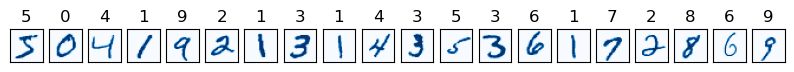

In [9]:
# Visulaizing Subsets of images in MNIST Dataset along with coressponding labels.

fig=plt.figure(figsize=(10,3))
for i in range(20):
    ax =fig.add_subplot(2,20,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Blues')
    ax.set_title(y_train[i])

In [10]:
# showing shape of single image
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

In [11]:
# Creating aSequential Model in Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Displaying Neural Network Model
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [14]:
# Making Prediction on Model
prediction = model(x_train[:1]).numpy()
prediction

array([[ 0.0202602 ,  0.15836725, -0.06657144, -0.20031425,  0.14945462,
         0.01582764,  1.1821446 ,  0.1755727 , -0.60533434, -0.388072  ]],
      dtype=float32)

In [15]:
# Applying Softmax() Function to prediction array
# This convert an output vector of real numbers into a probability distribution over predicted classes
tf.nn.softmax(prediction).numpy()

array([[0.08647414, 0.09928083, 0.0792822 , 0.06935727, 0.0983999 ,
        0.08609169, 0.27636704, 0.10100377, 0.04625876, 0.05748437]],
      dtype=float32)

In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

In [17]:
# Training the Model
model.fit(x_train, y_train, epochs=20)

Epoch 1/20


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2973 - accuracy: 0.9135
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1448 - accuracy: 0.9571
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1070 - accuracy: 0.9675
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0872 - accuracy: 0.9728
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0750 - accuracy: 0.9774
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9795
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0567 - accuracy: 0.9818
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0537 - accuracy: 0.9826
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0491 - accuracy: 0.9843
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0449 - accurac

In [18]:
# Evaluating the Model
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0812 - accuracy: 0.9809 - 494ms/epoch - 2ms/step


[0.08116846531629562, 0.98089998960495]

In [19]:
# Creating a new sequential model which includes both previously trained model and softmax layer.
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.6512938e-16, 6.4447362e-12, 2.3775440e-11, 2.7345422e-08,
        2.5571813e-19, 9.0726554e-15, 1.5632515e-26, 1.0000000e+00,
        2.8498776e-14, 3.2849305e-09],
       [1.4270727e-11, 1.7764518e-10, 1.0000000e+00, 2.3150158e-15,
        6.7864876e-35, 1.9137875e-11, 1.0364387e-13, 3.7101998e-28,
        4.8067775e-14, 1.2924329e-31],
       [2.2289814e-09, 9.9985063e-01, 6.1938954e-05, 1.5359430e-07,
        2.7229705e-08, 1.6087813e-07, 1.7833044e-07, 4.7509362e-05,
        3.9427683e-05, 3.7980636e-11],
       [9.9999917e-01, 3.9666773e-15, 3.5695430e-07, 9.1310575e-13,
        2.1577803e-08, 4.5736068e-09, 3.2911429e-09, 4.3236594e-07,
        2.6602850e-14, 9.2648271e-09],
       [1.2848248e-08, 6.5710806e-18, 6.4958899e-10, 1.3392611e-13,
        9.9999702e-01, 7.0980264e-15, 3.3887140e-11, 6.9194806e-07,
        3.2351706e-13, 2.2645063e-06]], dtype=float32)>

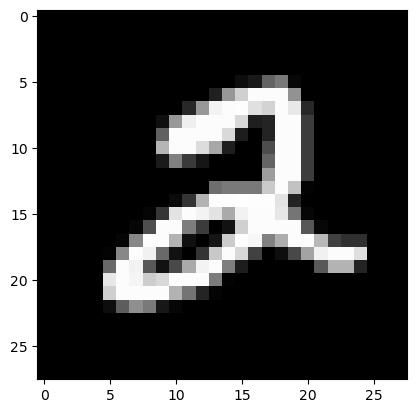

In [20]:
# Displaying a Grayscale Image
img = x_train[5]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [21]:
# Predicting the Result
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 82ms/step
predicted : 2


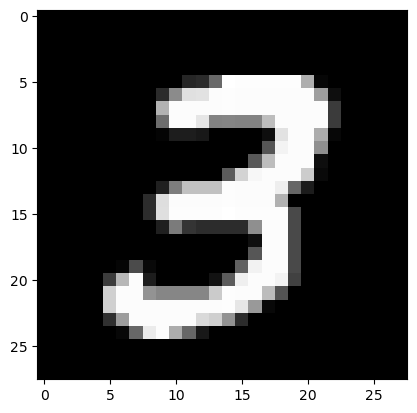

In [22]:
# Displaying a Grayscale Image
img = x_train[7]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [23]:
# Predicting the Result
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 19ms/step
predicted : 3
